In [1]:
import numpy as np, pandas as pd

# scipy
import scipy
from scipy.stats import rankdata
from scipy.spatial.distance import euclidean

# networkx
import networkx as nx

from collections import Counter 

import matplotlib.pyplot as plt

In [2]:
scipy.__version__, nx.__version__

('1.7.1', '2.6.3')

# A 2-dim random sample

In [3]:
n = 100

## Bivariate Normal

In [4]:
mean = [0,0] 
cov = [[1, 0], [0, 1]]
normal_sample = np.random.multivariate_normal(mean, cov, n)

## Bivariate Uniform

In [5]:
xy_min = [0, 0]
xy_max = [10, 10]
uniform_sample = np.random.uniform(low=xy_min, high=xy_max, size=(n,2))

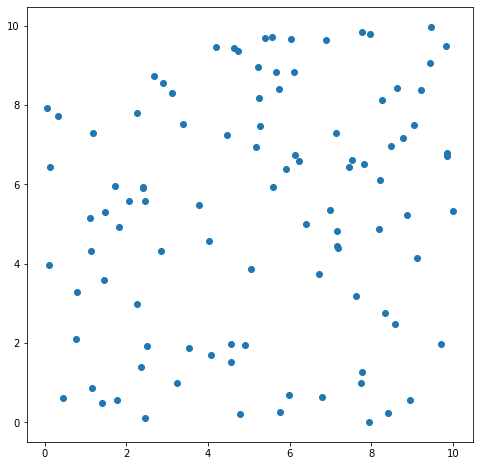

In [6]:
sample = uniform_sample
plt.rcParams["figure.figsize"] = (8,8)
plt.scatter(sample[:,0], sample[:,1])

In [7]:
distance_matrix = np.zeros([n, n])

for j in range(n):
    for i in range(n):
        distance_matrix[i,j] = (euclidean(sample[i], sample[j]))

distance_matrix

array([[ 0.        ,  5.04559427,  8.5331643 , ...,  2.75005893,
        11.11869295,  5.78847231],
       [ 5.04559427,  0.        ,  6.43310977, ...,  3.21016663,
         6.406202  ,  2.85829974],
       [ 8.5331643 ,  6.43310977,  0.        , ...,  8.67392948,
         6.10809212,  9.28376403],
       ...,
       [ 2.75005893,  3.21016663,  8.67392948, ...,  0.        ,
         9.61556425,  3.06218684],
       [11.11869295,  6.406202  ,  6.10809212, ...,  9.61556425,
         0.        ,  8.15391485],
       [ 5.78847231,  2.85829974,  9.28376403, ...,  3.06218684,
         8.15391485,  0.        ]])

In [8]:
# Replace diagonal with a large number to prevent trivial matching
M = np.max(distance_matrix)
np.fill_diagonal(distance_matrix, 2 * M)

In [9]:
distance_matrix[:5,:5]

array([[26.01532407,  5.04559427,  8.5331643 ,  3.29514063,  4.66879178],
       [ 5.04559427, 26.01532407,  6.43310977,  2.06977769,  2.49244003],
       [ 8.5331643 ,  6.43310977, 26.01532407,  7.69504516,  8.83881135],
       [ 3.29514063,  2.06977769,  7.69504516, 26.01532407,  1.66735211],
       [ 4.66879178,  2.49244003,  8.83881135,  1.66735211, 26.01532407]])

# SciPy

# A minimum distance non-bipartite matching on `sample`  

Equivalently, a linear sum assignment between `sample` and `sample`.  

To prevent a trivial matching (each element matching with itself), I have replaced the diagonal zeros with a large number.

## Timing `SciPy`

In [10]:
%%time
# scipy.optimize.linear_sum_assignment

row, col = scipy.optimize.linear_sum_assignment(distance_matrix, maximize=False)
scipy_matching = np.concatenate([[row], [col]]).T.tolist()

CPU times: user 260 µs, sys: 32 µs, total: 292 µs
Wall time: 273 µs


In [11]:
scipy_matching

[[0, 18],
 [1, 48],
 [2, 70],
 [3, 42],
 [4, 92],
 [5, 14],
 [6, 35],
 [7, 30],
 [8, 71],
 [9, 96],
 [10, 29],
 [11, 20],
 [12, 62],
 [13, 31],
 [14, 57],
 [15, 95],
 [16, 34],
 [17, 72],
 [18, 0],
 [19, 44],
 [20, 11],
 [21, 79],
 [22, 37],
 [23, 36],
 [24, 76],
 [25, 10],
 [26, 53],
 [27, 17],
 [28, 38],
 [29, 25],
 [30, 7],
 [31, 13],
 [32, 80],
 [33, 55],
 [34, 16],
 [35, 6],
 [36, 23],
 [37, 54],
 [38, 28],
 [39, 43],
 [40, 45],
 [41, 46],
 [42, 3],
 [43, 39],
 [44, 19],
 [45, 40],
 [46, 41],
 [47, 94],
 [48, 81],
 [49, 77],
 [50, 75],
 [51, 56],
 [52, 65],
 [53, 26],
 [54, 66],
 [55, 33],
 [56, 51],
 [57, 5],
 [58, 91],
 [59, 9],
 [60, 90],
 [61, 93],
 [62, 68],
 [63, 85],
 [64, 83],
 [65, 52],
 [66, 69],
 [67, 74],
 [68, 12],
 [69, 22],
 [70, 2],
 [71, 8],
 [72, 27],
 [73, 82],
 [74, 67],
 [75, 84],
 [76, 24],
 [77, 49],
 [78, 99],
 [79, 21],
 [80, 97],
 [81, 1],
 [82, 73],
 [83, 64],
 [84, 50],
 [85, 63],
 [86, 98],
 [87, 88],
 [88, 87],
 [89, 61],
 [90, 60],
 [91, 58],
 [92, 4

In most cases, the matching is symmetric - i.e., if `sample[i]` matches with `sample[j]`, then `sample[j]` matches with `sample[i]`. 

But in some cases, the matchings form triangles or polygons:

# Finding polygons

In [12]:
sorted_matching = sorted([sorted(i) for i in scipy_matching], key = lambda x: x[0])
count = Counter([tuple(i) for i in sorted_matching])
polygons = [list(t) for t in count if count[t] < 2]

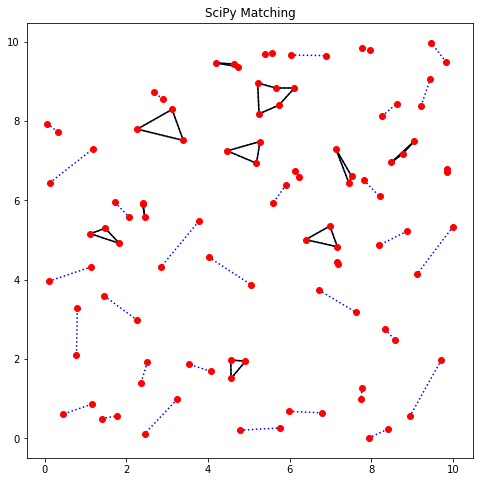

In [13]:
fig1, ax1 = plt.subplots()

plt.rcParams["figure.figsize"] = (8,8)

ax1.set_title('SciPy Matching')

for i in np.unique(sorted_matching, axis = 0):
    ax1.plot(* sample[i].T, c = 'b', linestyle='dotted')
    
for i in polygons:
    ax1.plot(* sample[i].T, c = 'k', linestyle='solid')

for p in sample:
    ax1.plot(* p.T, marker = 'o', c = 'r')
    
plt.show()

# networkx

In [14]:
weighted_edges = []
for i in range(len(distance_matrix)):
    for j in range(len(distance_matrix)):
        if i < j:
            weighted_edges.append( (i, j, distance_matrix[i,j]) )
        else:
            pass

In [15]:
G = nx.Graph()
G.add_nodes_from(np.arange(18))
G.add_weighted_edges_from(weighted_edges)

## Timing `networkx`

In [16]:
%%time
nx_matching = nx.algorithms.matching.min_weight_matching(G, maxcardinality=True)
nx_matching = [ list(p) for p in nx_matching ]

CPU times: user 805 ms, sys: 3.15 ms, total: 808 ms
Wall time: 808 ms


In [17]:
nx_sorted_matching = sorted([sorted(i) for i in nx_matching], key = lambda x: x[0])
nx_count = Counter([tuple(i) for i in nx_sorted_matching])

In [18]:
nx_sorted_matching

[[0, 18],
 [1, 36],
 [2, 70],
 [3, 42],
 [4, 92],
 [5, 57],
 [6, 31],
 [7, 30],
 [8, 85],
 [9, 59],
 [10, 14],
 [11, 61],
 [12, 68],
 [13, 46],
 [15, 95],
 [16, 34],
 [17, 72],
 [19, 44],
 [20, 67],
 [21, 79],
 [22, 69],
 [23, 63],
 [24, 76],
 [25, 29],
 [26, 53],
 [27, 90],
 [28, 38],
 [32, 84],
 [33, 55],
 [35, 71],
 [37, 62],
 [39, 43],
 [40, 45],
 [41, 86],
 [47, 94],
 [48, 81],
 [49, 77],
 [50, 75],
 [51, 56],
 [52, 65],
 [54, 66],
 [58, 91],
 [60, 96],
 [64, 83],
 [73, 82],
 [74, 98],
 [78, 99],
 [80, 97],
 [87, 88],
 [89, 93]]

## There are no cycles with more than 3 nodes.

In [19]:
# Each node appears on exactly one edge, each edge has exactly two nodes, and all nodes are used up
len(nx_sorted_matching), len(set(np.concatenate(nx_sorted_matching)))

(50, 100)

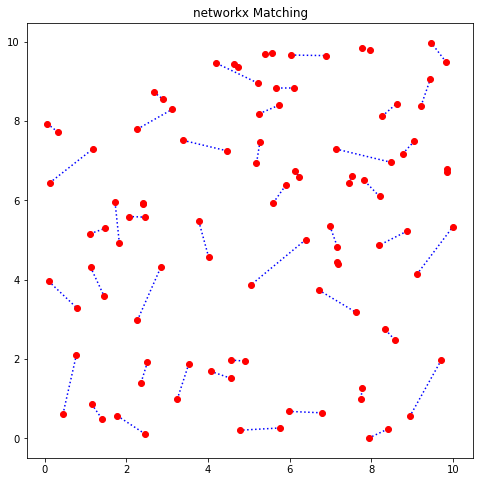

In [20]:

fig2, ax2 = plt.subplots()

plt.rcParams["figure.figsize"] = (8,8)

ax2.set_title('networkx Matching')

for i in nx_matching:
    ax2.plot(* sample[i].T, c = 'b', linestyle='dotted')
    
for p in sample:
    ax2.plot(* p.T, marker = 'o', c = 'r')
    
plt.show()